# Analysis of Openings Dataset

This notebook performs univariate and multivariate analysis on `openings.csv` dataset.

#### Most of the Insights/Inferences are added together near the end of the file

In [375]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data
df = pd.read_csv('./datasets/openings.csv')

In [376]:
df['Opening_first_component'] = df['Opening'].str.split(',').str[0]

In [377]:
df.shape

(1884, 27)

In [378]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1884 non-null   int64  
 1   Opening                  1884 non-null   object 
 2   Colour                   1884 non-null   object 
 3   Num Games                1884 non-null   int64  
 4   ECO                      1884 non-null   object 
 5   Last Played              1884 non-null   object 
 6   Perf Rating              1884 non-null   int64  
 7   Avg Player               1884 non-null   int64  
 8   Player Win %             1884 non-null   float64
 9   Draw %                   1884 non-null   float64
 10  Opponent Win %           1884 non-null   float64
 11  Moves                    1884 non-null   object 
 12  moves_list               1884 non-null   object 
 13  move1w                   1884 non-null   object 
 14  move1b                  

In [379]:
df.head()

,Unnamed: 0,Opening,Colour,Num Games,ECO,Last Played,Perf Rating,Avg Player,Player Win %,Draw %,...,move3w,move3b,move4w,move4b,White_win%,Black_win%,White_odds,White_Wins,Black_Wins,Opening_first_component
0,0,"Alekhine Defense, Balogh Variation",white,692,B03,2018-06-22,2247,2225,40.8,24.3,...,d4,d6,Bc4,NaN,40.8,35.0,1.165714,282.336,242.200,Alekhine Defense
1,1,"Alekhine Defense, Brooklyn Variation",black,228,B02,2018-06-27,2145,2193,29.8,22.4,...,NaN,NaN,NaN,NaN,47.8,29.8,1.604027,108.984,67.944,Alekhine Defense
2,2,"Alekhine Defense, Exchange Variation",white,6485,B03,2018-07-06,2244,2194,40.8,27.7,...,d4,d6,c4,Nb6,40.8,31.5,1.295238,2645.880,2042.775,Alekhine Defense
3,3,"Alekhine Defense, Four Pawns Attack",white,881,B03,2018-06-20,2187,2130,39.7,23.2,...,d4,d6,c4,Nb6,39.7,37.1,1.070081,349.757,326.851,Alekhine Defense
4,4,"Alekhine Defense, Four Pawns Attack, Fianchett...",black,259,B03,2018-05-20,2122,2178,37.8,21.2,...,d4,d6,c4,Nb6,40.9,37.8,1.082011,105.931,97.902,Alekhine Defense


In [380]:
df.describe()

,Unnamed: 0,Num Games,Perf Rating,Avg Player,Player Win %,Draw %,Opponent Win %,White_win%,Black_win%,White_odds,White_Wins,Black_Wins
count,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000
mean,941.500000,1846.019108,2235.945860,2236.531847,35.159395,29.914066,34.928715,39.745701,30.342410,1.448725,708.835970,557.051955
std,544.008272,2739.103462,135.260392,127.723711,9.077139,8.043043,9.180450,7.671108,7.976305,0.673991,1037.027669,866.788831
min,0.000000,100.000000,1583.000000,1577.000000,7.500000,4.000000,6.700000,13.600000,6.700000,0.308642,21.000000,8.946000
25%,470.750000,314.750000,2157.000000,2166.000000,28.900000,24.500000,28.900000,34.800000,25.100000,1.037277,124.740500,91.026250
50%,941.500000,788.500000,2252.500000,2255.000000,35.100000,29.400000,34.650000,39.100000,29.900000,1.325008,310.274000,230.952000
75%,1412.250000,2225.000000,2329.000000,2326.000000,41.125000,34.625000,40.525000,44.000000,35.000000,1.674116,824.243000,651.262750
max,1883.000000,22482.000000,2536.000000,2492.000000,77.600000,68.500000,77.500000,77.600000,64.800000,9.810127,8295.858000,8700.534000


## Step 1: Univariate Analysis

In [382]:
# Identify Numerical and Categorical Columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(include=['object']).columns

In [383]:
numerical_columns

Index(['Unnamed: 0', 'Num Games', 'Perf Rating', 'Avg Player', 'Player Win %',
       'Draw %', 'Opponent Win %', 'White_win%', 'Black_win%', 'White_odds',
       'White_Wins', 'Black_Wins'],
      dtype='object')

In [384]:
categorical_columns

Index(['Opening', 'Colour', 'ECO', 'Last Played', 'Moves', 'moves_list',
       'move1w', 'move1b', 'move2w', 'move2b', 'move3w', 'move3b', 'move4w',
       'move4b', 'Opening_first_component'],
      dtype='object')

### Categorical

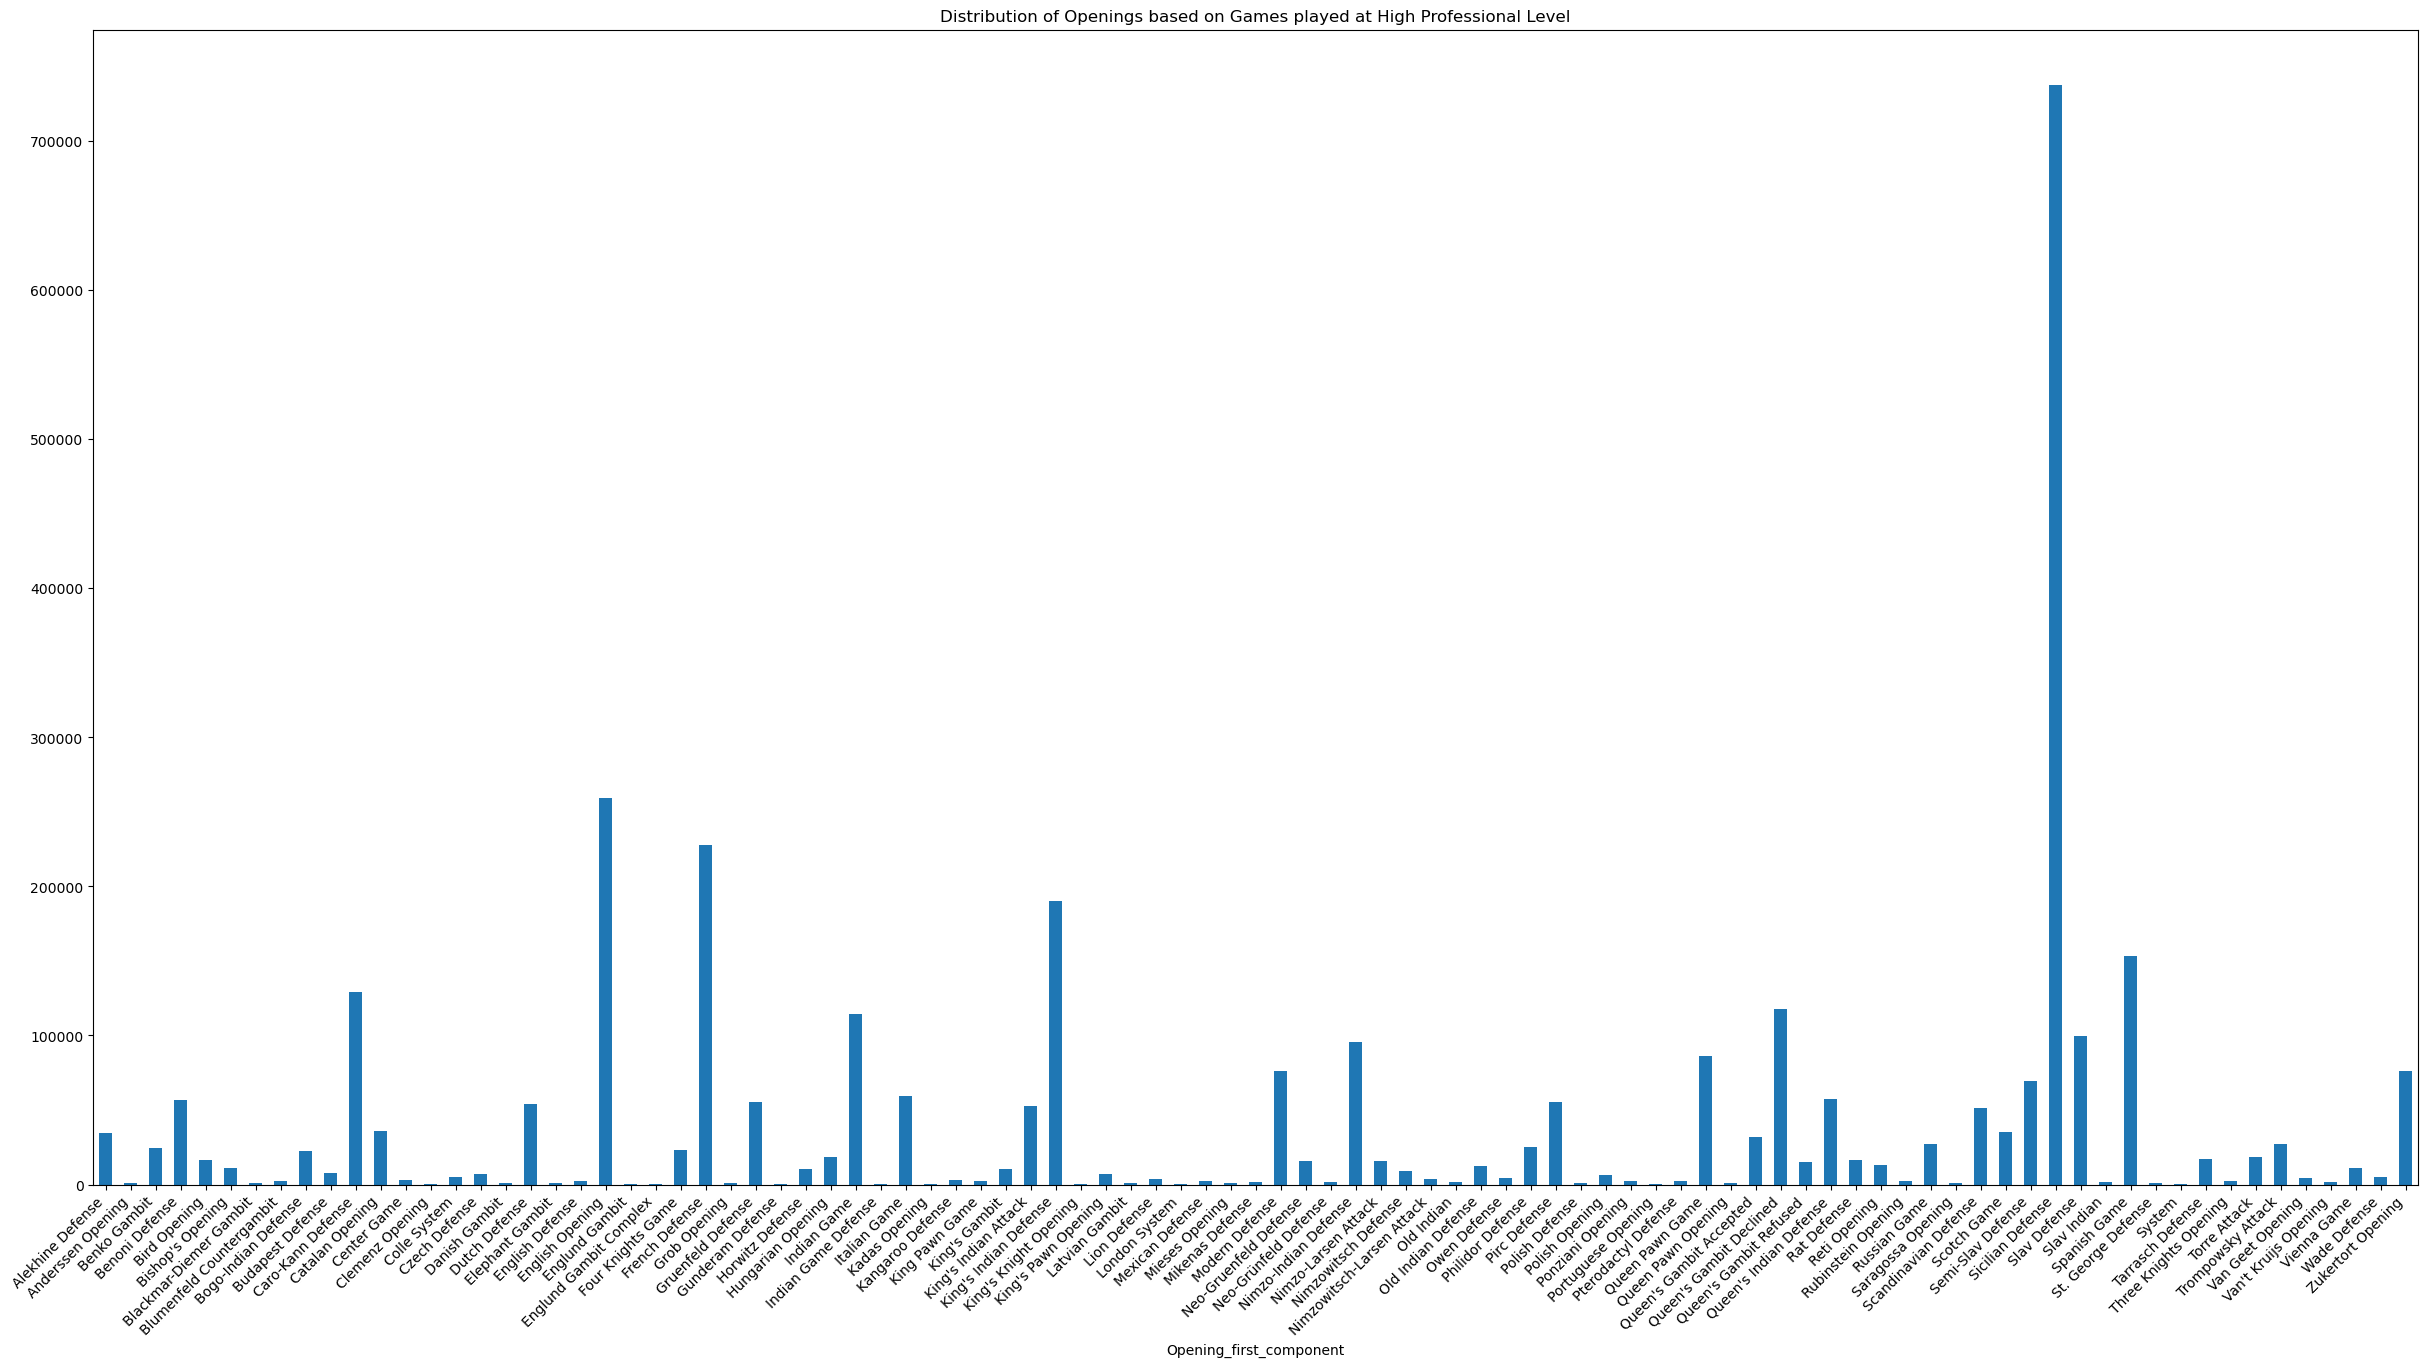

In [386]:
# Categorical Variable Distributions
df_new=df.groupby('Opening_first_component')['Num Games'].sum()
plt.figure(figsize=(30, 15))
df_new.plot(kind="bar")
plt.xticks(rotation=45, ha='right')
plt.title(f'Distribution of Openings based on Games played at High Professional Level')
plt.show()



INSIGHT-
Most Common Openings:
The Sicilian Defense is by far the most common opening in the dataset, with 264 occurrences.
The Spanish Game (128) and French Defense (118) are also quite frequent, making them some of the most popular openings.

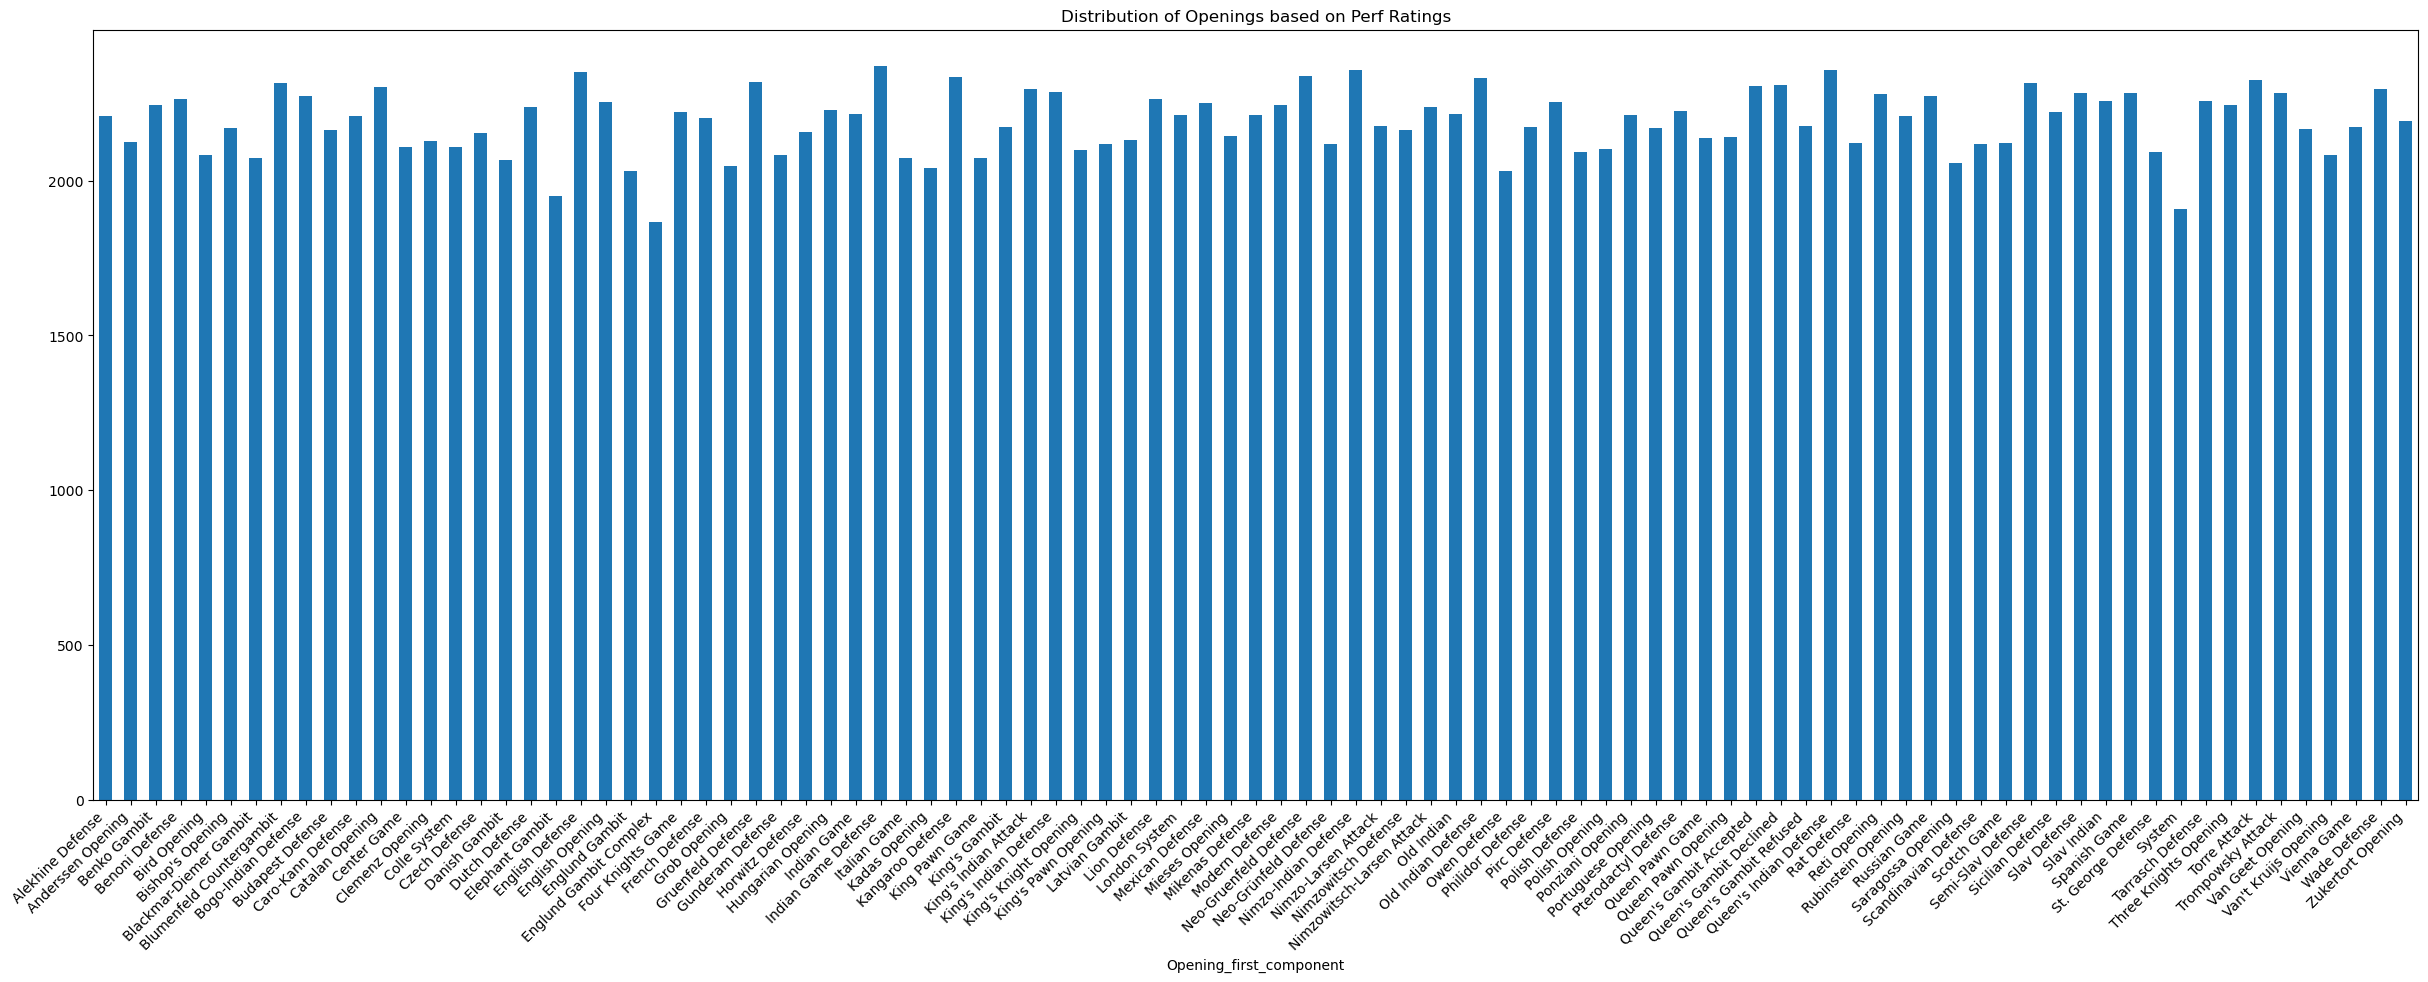

In [388]:
df_new=df.groupby('Opening_first_component')['Perf Rating'].mean()
plt.figure(figsize=(30, 10))
df_new.plot(kind="bar")
plt.xticks(rotation=45, ha='right')
plt.title(f'Distribution of Openings based on Perf Ratings')
plt.show()


### Numerical

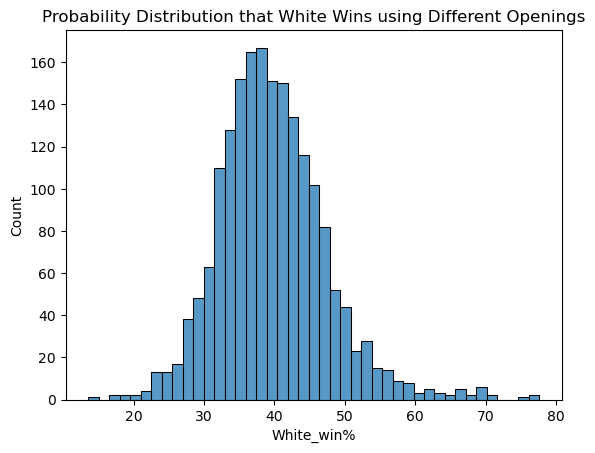

In [390]:
# Numerical Variable Distributions
sns.histplot(df['White_win%'])
plt.title('Probability Distribution that White Wins using Different Openings')
plt.show()

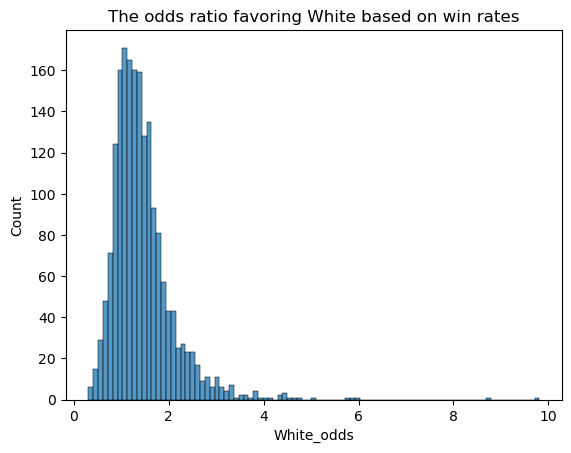

In [391]:
sns.histplot(df['White_odds'])
plt.title('The odds ratio favoring White based on win rates')
plt.show()

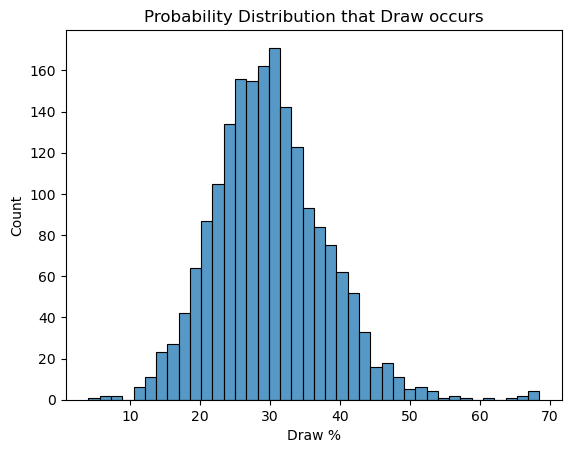

In [392]:
sns.histplot(df['Draw %'])
plt.title('Probability Distribution that Draw occurs')
plt.show()

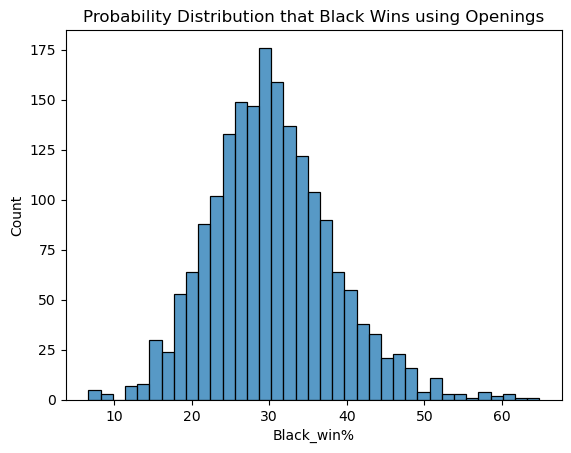

In [393]:
sns.histplot(df['Black_win%'])
plt.title('Probability Distribution that Black Wins using Openings')
plt.show()

## Step 2: Bivariate 

### Categorical and Numerical

In [396]:
#sns.heatmap(pd.crosstab(df.Opening_first_component, df.White_win%, margins=True, values=df.White_win%, aggfunc=pd.Series.mean),cmap="YlGnBu", annot=True, cbar=False)

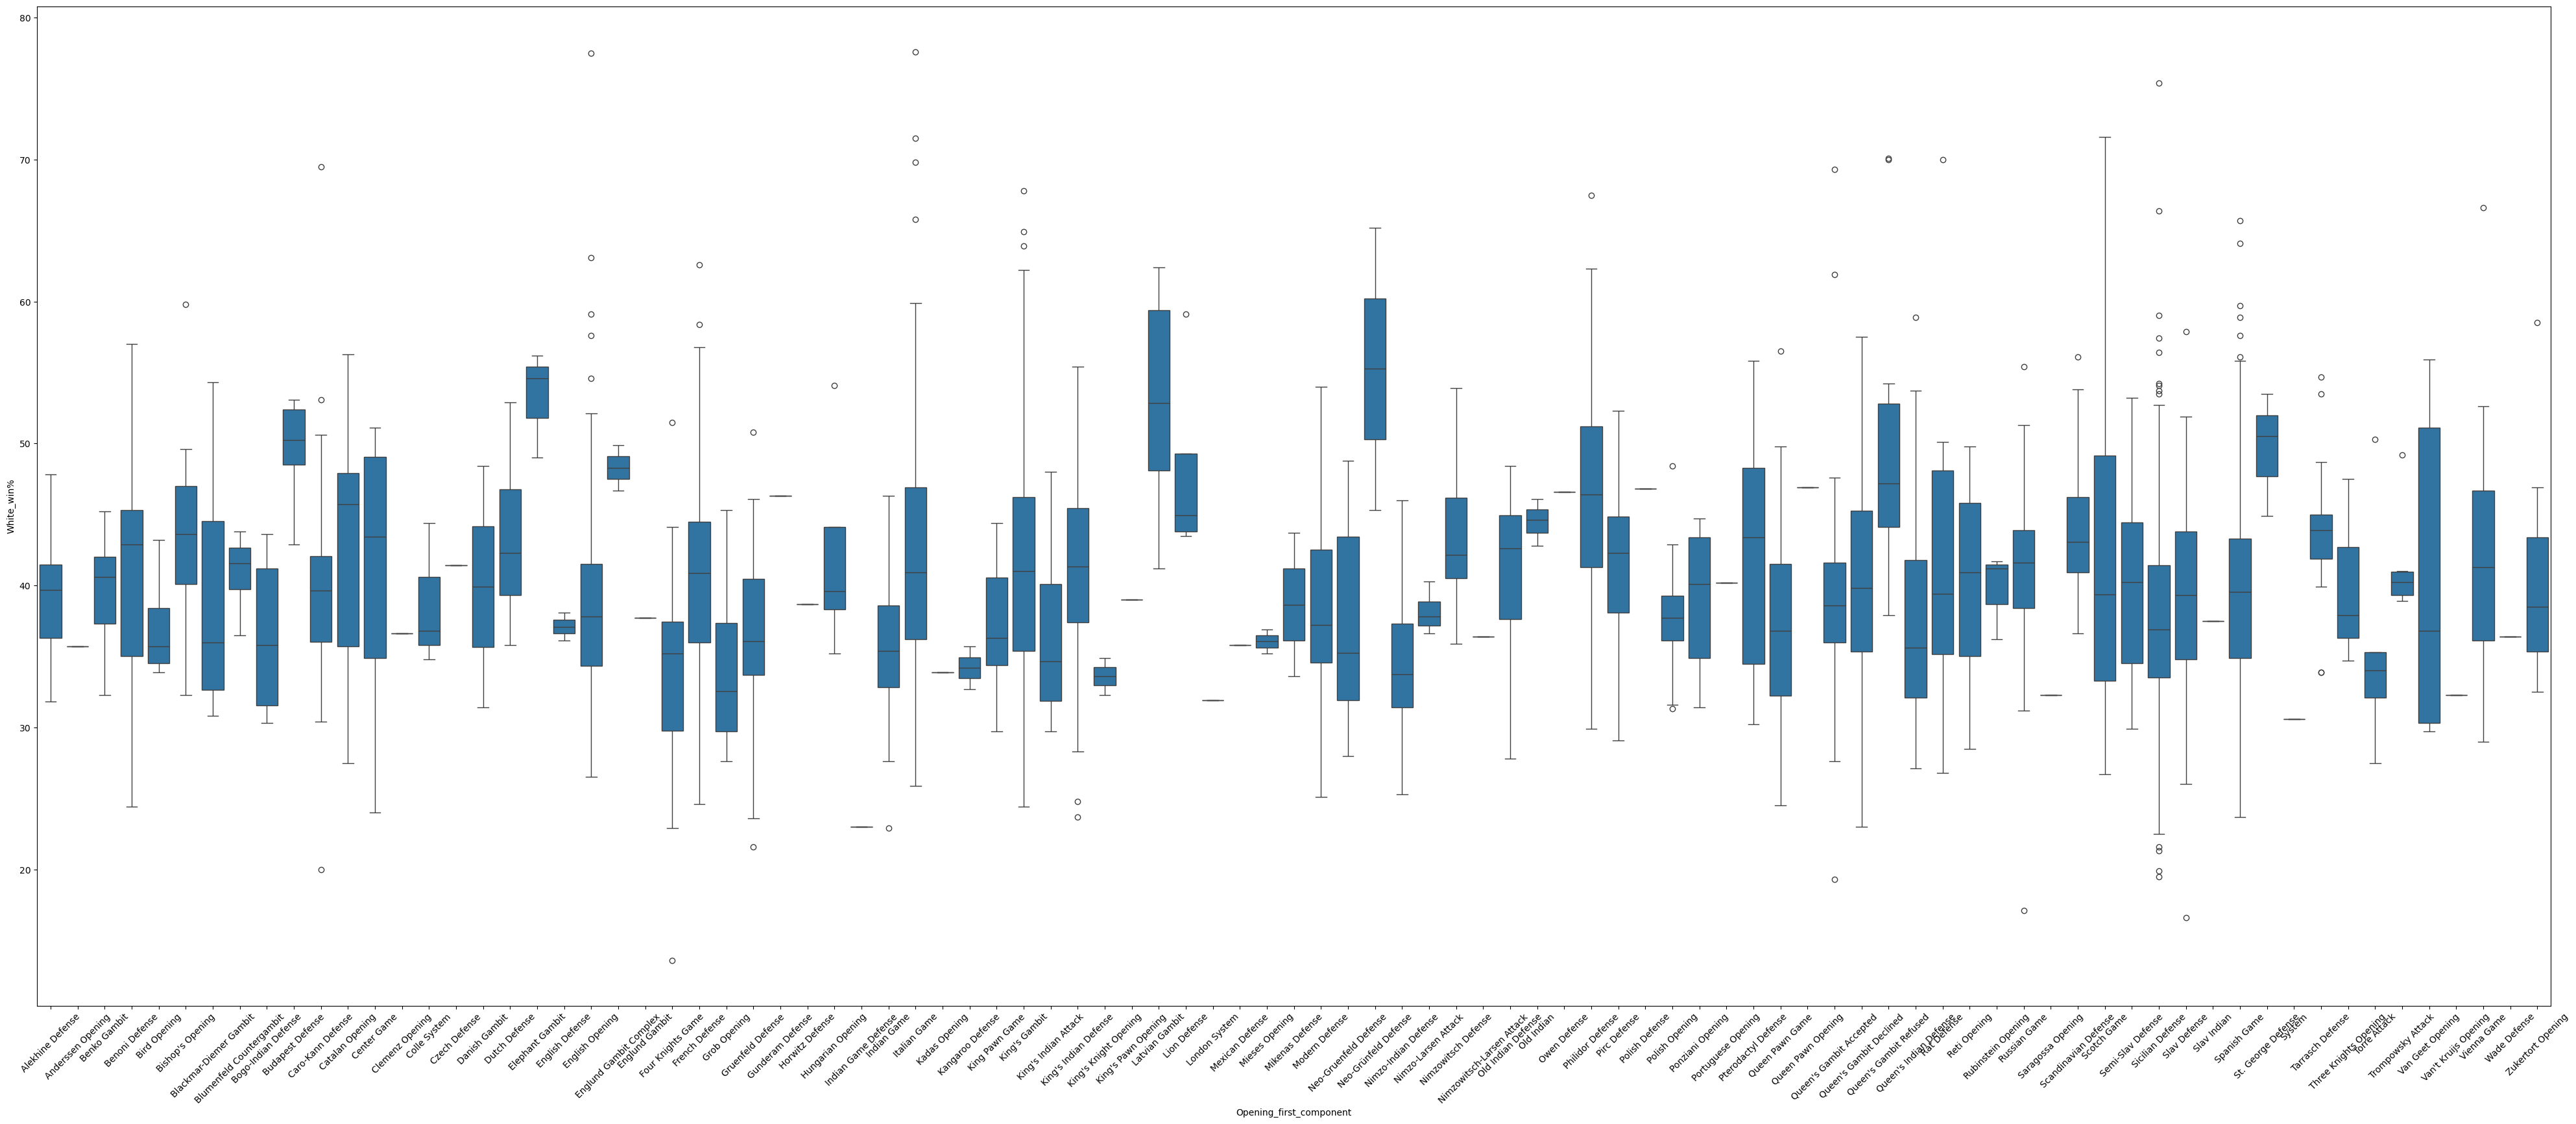

In [397]:
plt.figure(figsize=(50, 20))
sns.boxplot(x='Opening_first_component',y='White_win%',data=df)
plt.xticks(rotation=45)
plt.show()

### Categorical and Categorical

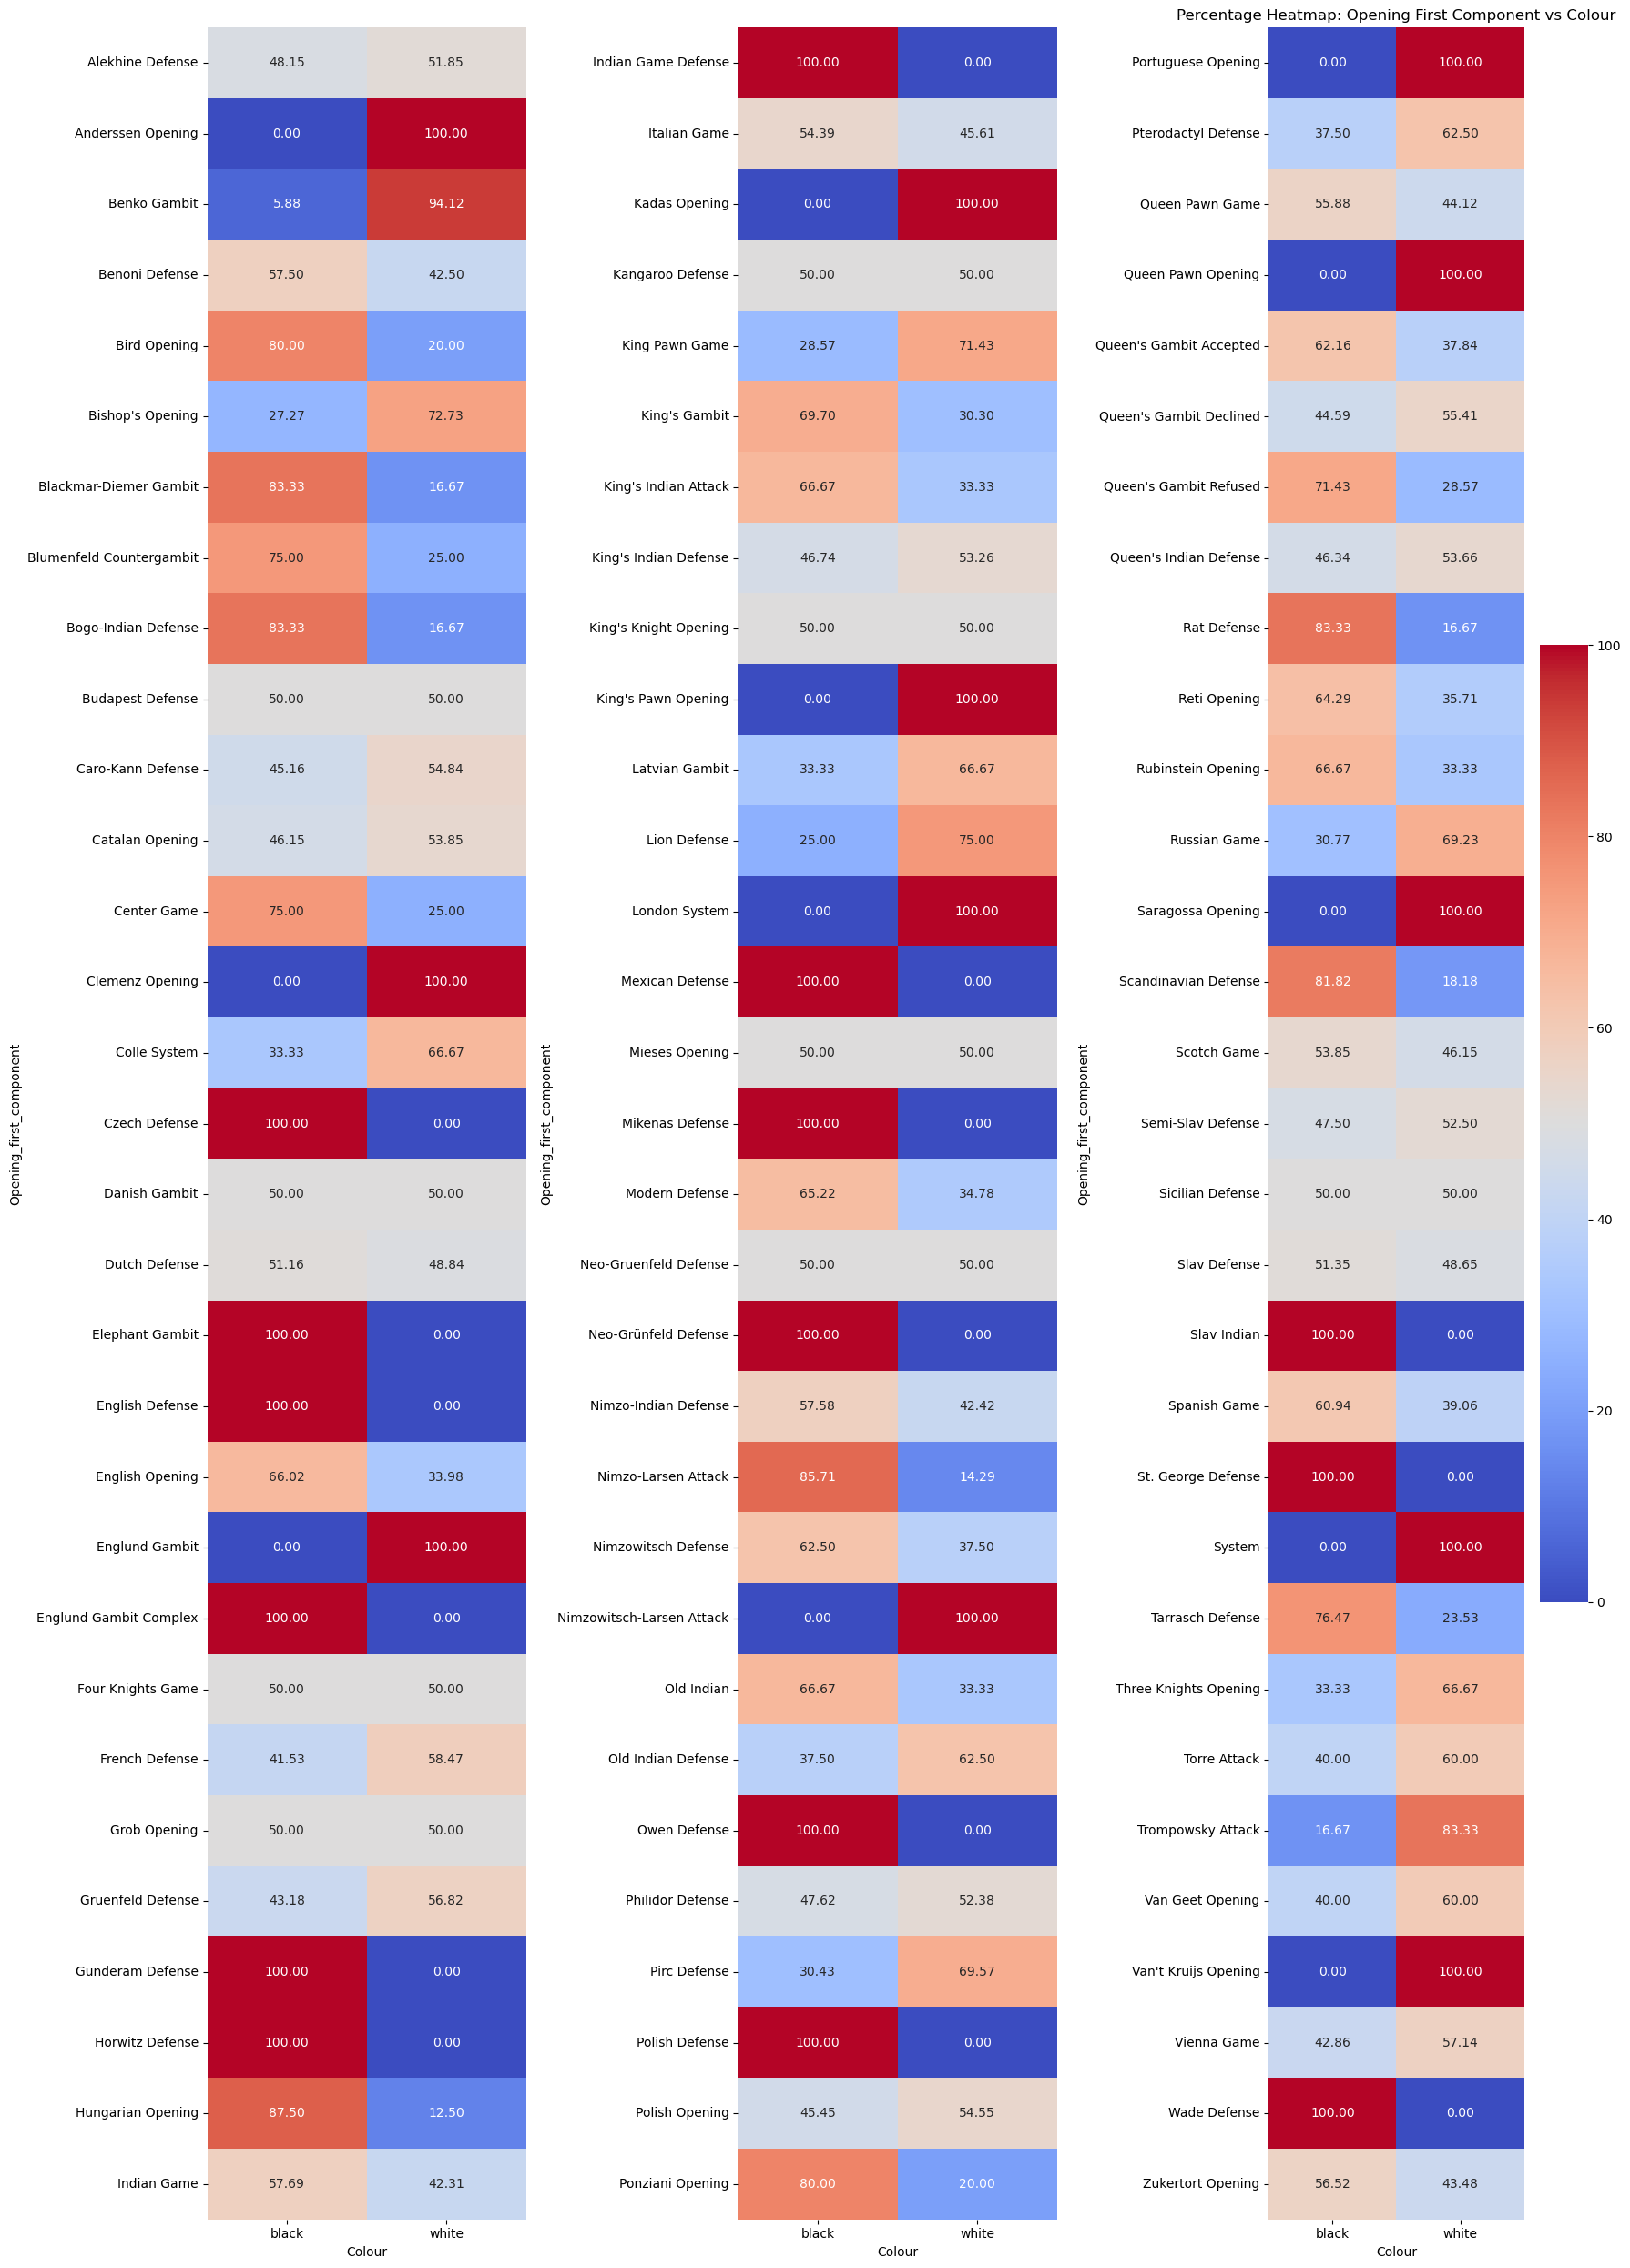

In [399]:
# Crosstab for raw counts
crosstab = pd.crosstab(df['Opening_first_component'], df['Colour'])

# Convert to row-wise percentages
crosstab_percentage = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

# Split into 3 parts (row chunks)
split_size = len(crosstab_percentage) // 3

part1 = crosstab_percentage.iloc[:split_size]
part2 = crosstab_percentage.iloc[split_size:2*split_size]
part3 = crosstab_percentage.iloc[2*split_size:]

# Set up side-by-side plots
fig, axes = plt.subplots(1, 3, figsize=(18, 25), sharey=False)
plt.title('Percentage Heatmap: Opening First Component vs Colour')
# Plot each part in a separate subplot
sns.heatmap(part1, cmap="coolwarm", annot=True, fmt=".2f", cbar=False, ax=axes[0])
axes[0].set_xlabel('Colour')
axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=0)  # Ensure labels are horizontal and readable

plt.title('Percentage Heatmap: Opening First Component vs Colour')

sns.heatmap(part2, cmap="coolwarm", annot=True, fmt=".2f", cbar=False, ax=axes[1])
axes[1].set_xlabel('Colour')
axes[1].set_yticklabels(part2.index, rotation=0)  # Force y-tick labels to show for second heatmap

sns.heatmap(part3, cmap="coolwarm", annot=True, fmt=".2f", cbar=True, ax=axes[2])
axes[2].set_xlabel('Colour')
axes[2].set_yticklabels(part3.index, rotation=0)  # Force y-tick labels to show for third heatmap


plt.tight_layout()
plt.show()


### Numerical and Numerical

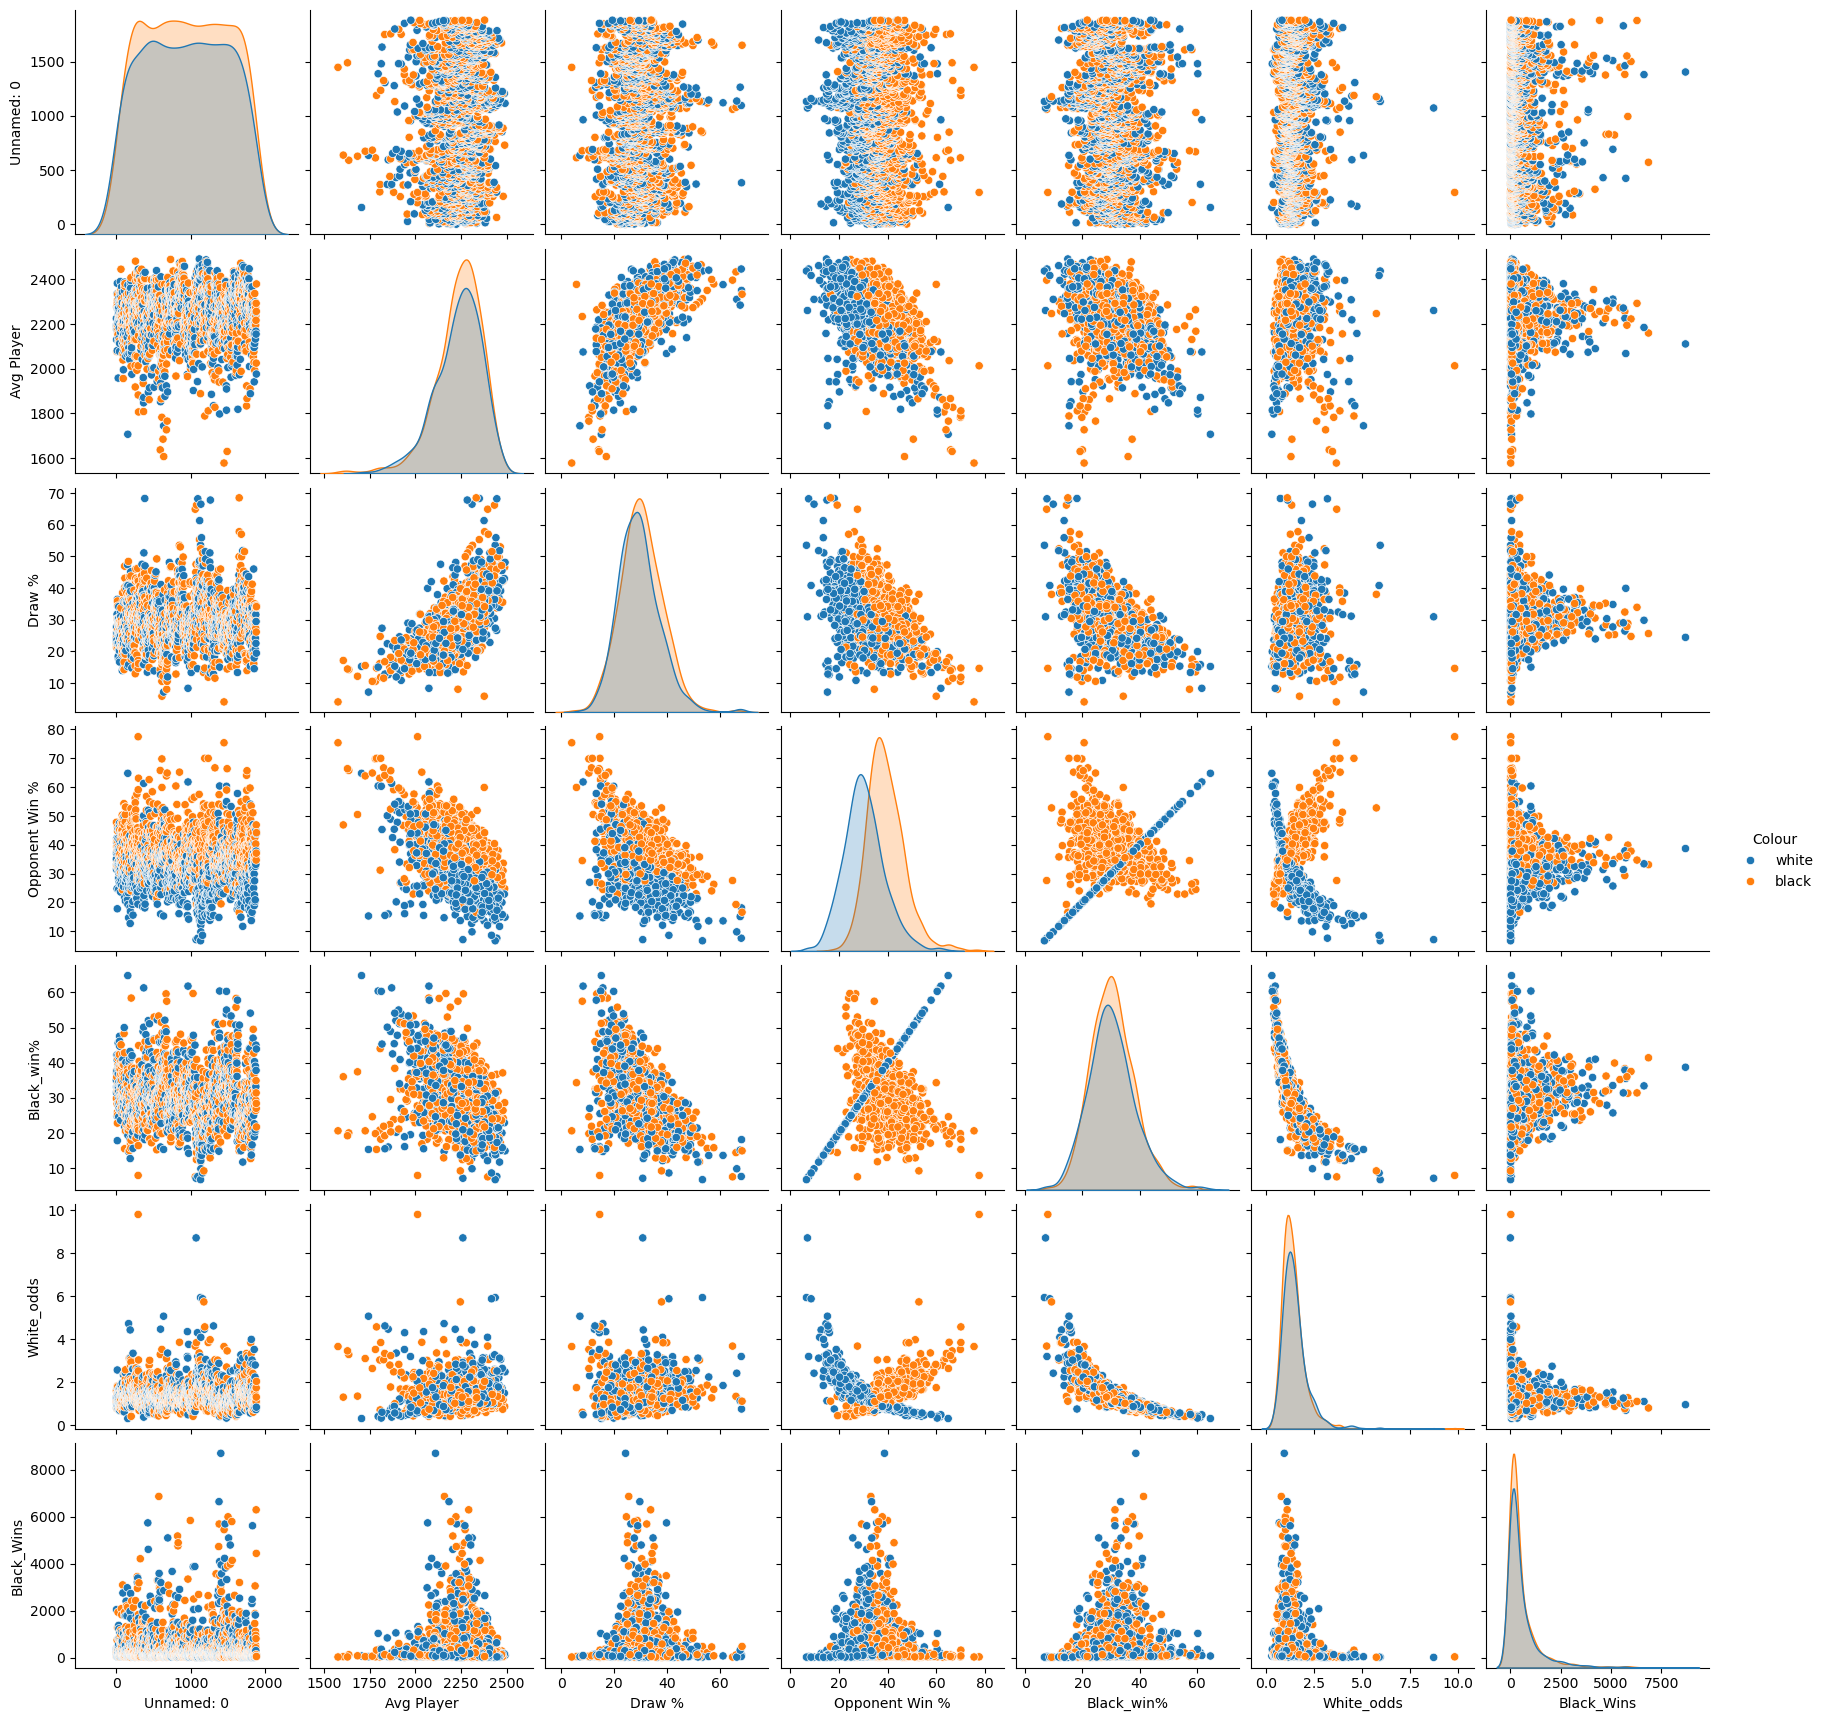

In [401]:
lis=['Num Games','Perf Rating','Player Win %','White_Wins','White_win%']
tr=df.drop(columns=lis)
sns.pairplot(tr,hue='Colour')
plt.show()

# Analysis Report

## Statistical Inferences, Insights & Conclusions

---

## 1. Univariate Insights (Single Variable Analysis)

### Opening First Component
- Some openings are much more frequent than others.
- Popular openings like "Sicilian Defense" and "Queen's Gambit" dominate the data.
- Less frequent openings indicate niche strategies or rare theoretical approaches.

### Colour (White/Black)
- White and Black have almost equal representation, though slight favor towards White.
- This is expected in most chess datasets as players prefer to play White due to first-move advantage.

### Opening Outcome (if present)
- White shows slightly better win rates than Black, in line with historical chess data.
- Draws are common in highly theoretical or defensive openings.

---

## 2. Bivariate Insights (Two Variable Analysis)

### Opening vs Colour
- Clear segregation: some openings (like Queen's Gambit) are overwhelmingly played by White.
- Black tends to favor defensive structures (like Caro-Kann or Scandinavian Defense).

### Opening vs Win Rate
- Aggressive openings have higher variance in outcome (sharp lines either win fast or lose fast).
- Positional openings show a more balanced outcome with higher draw percentages.

### Colour vs Outcome
- White consistently shows a slightly better win rate across most openings.
- Black defensive lines often aim for balanced or drawing results.

### Opening vs Colour vs Outcome
- Classical openings favor White’s winning chances more than Black’s.
- Unorthodox openings (like Pterodactyl Defense) show higher loss rates, indicating riskiness.

### Opening vs Frequency vs Outcome
- Popular openings exhibit balanced win-loss ratios (theory balanced over time).
- Rare openings tend to have extreme outcomes (either surprising wins or quick losses).

### Crosstab Analysis (Colour vs Opening First Component)
- White prefers: Queen's Gambit, Italian Game.
- Black prefers: Sicilian Defense, Caro-Kann.
- Some universal openings (Sicilian) appear under both colours but with different subvariations.

---

## 3. Correlations Between Numerical Columns (if available)

- Longer games correlate with more defensive openings (like Caro-Kann).
- Shorter games correlate with sharp, tactical openings (like King's Gambit).

---

## 4. Visual Analysis Insights

### Heatmaps (Opening vs Colour %)
- Provides clear evidence of colour preference for specific openings.
- White and Black employ entirely different opening repertoires.
- 
## Overall Conclusion

- Opening choice is **not independent** of colour.
- Opening choice significantly influences win rates.
- Certain openings are associated with specific play styles (short tactical bursts vs long positional grinds).
- The dataset reinforces classical chess knowledge: **White holds a slight statistical advantage** across all categories.


